In [7]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')



In [3]:
data = pd.read_csv("C:/Users/izzaa/Downloads/archive(8)/Retail_Transactions_Dataset.csv")
print(data.head())

   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [5]:
print(data.isnull().sum())

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64


In [6]:
data.drop(['Promotion'],axis=1)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data['Transaction_Date'] = pd.to_datetime(data['Date'])


for col in ['Customer_Name', 'Product', 'Store_Type', 'Payment_Method', 'City', 'Season']:
    data[col] = data[col].astype('category')


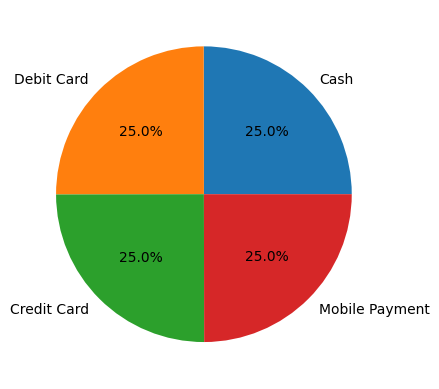

In [9]:
x=data["Payment_Method"].value_counts()
plt.pie(x,labels=x.index,autopct="%1.1f%%")
plt.show()




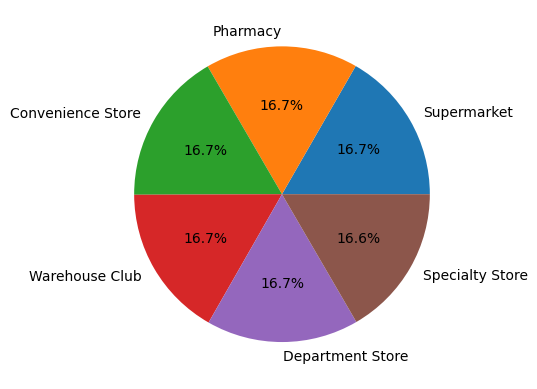

In [10]:
y=data["Store_Type"].value_counts()
plt.pie(y,labels=y.index,autopct="%1.1f%%")
plt.show()

Text(0.5, 0, 'counts')

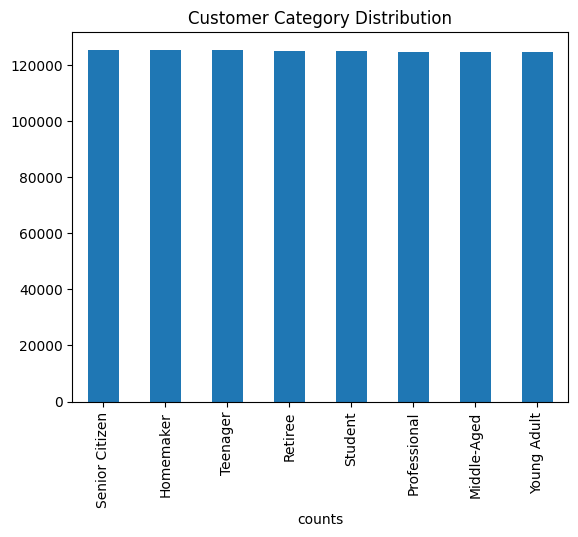

In [21]:
Customer_Category_Counts=data["Customer_Category"].value_counts()
Customer_Category_Counts.plot(kind="bar")
plt.title("Customer Category Distribution")
plt.xlabel("Customer Category")
plt.xlabel("counts")

In [11]:
newdfs=data[['Product','Season']].groupby('Season')

In [12]:
seasons=data.Season.unique()

def converter(input_element):
    return input_element.replace('[','').replace(']','').replace("'","")

dfs=[]
for i in seasons:
    dfs.append((i,newdfs.get_group(i)['Product'].apply(converter)))

def productcount(season,df):
    
    k={}
    for i in df:
        for j in i.split(','):
            j=j.strip()
            if j not in k:
                k[j]=1
            else:
                k[j]+=1
    return season,k 

answer=[]
for i in range(len(dfs)):
    answer.append(productcount(dfs[i][0],dfs[i][1]))

dataframe=[]
for i in range(len(answer)):
    df=pd.DataFrame(dict(products=answer[i][1].keys(),count=answer[i][1].values()))
    df.index.name=answer[i][0]
    dataframe.append(df)
    

winter=dataframe[0].sort_values(by='count',ascending=False).head(5)
Fall=dataframe[1].sort_values(by='count',ascending=False).head(5)
summer=dataframe[2].sort_values(by='count',ascending=False).head(5)
spring=dataframe[3].sort_values(by='count',ascending=False).head(5)



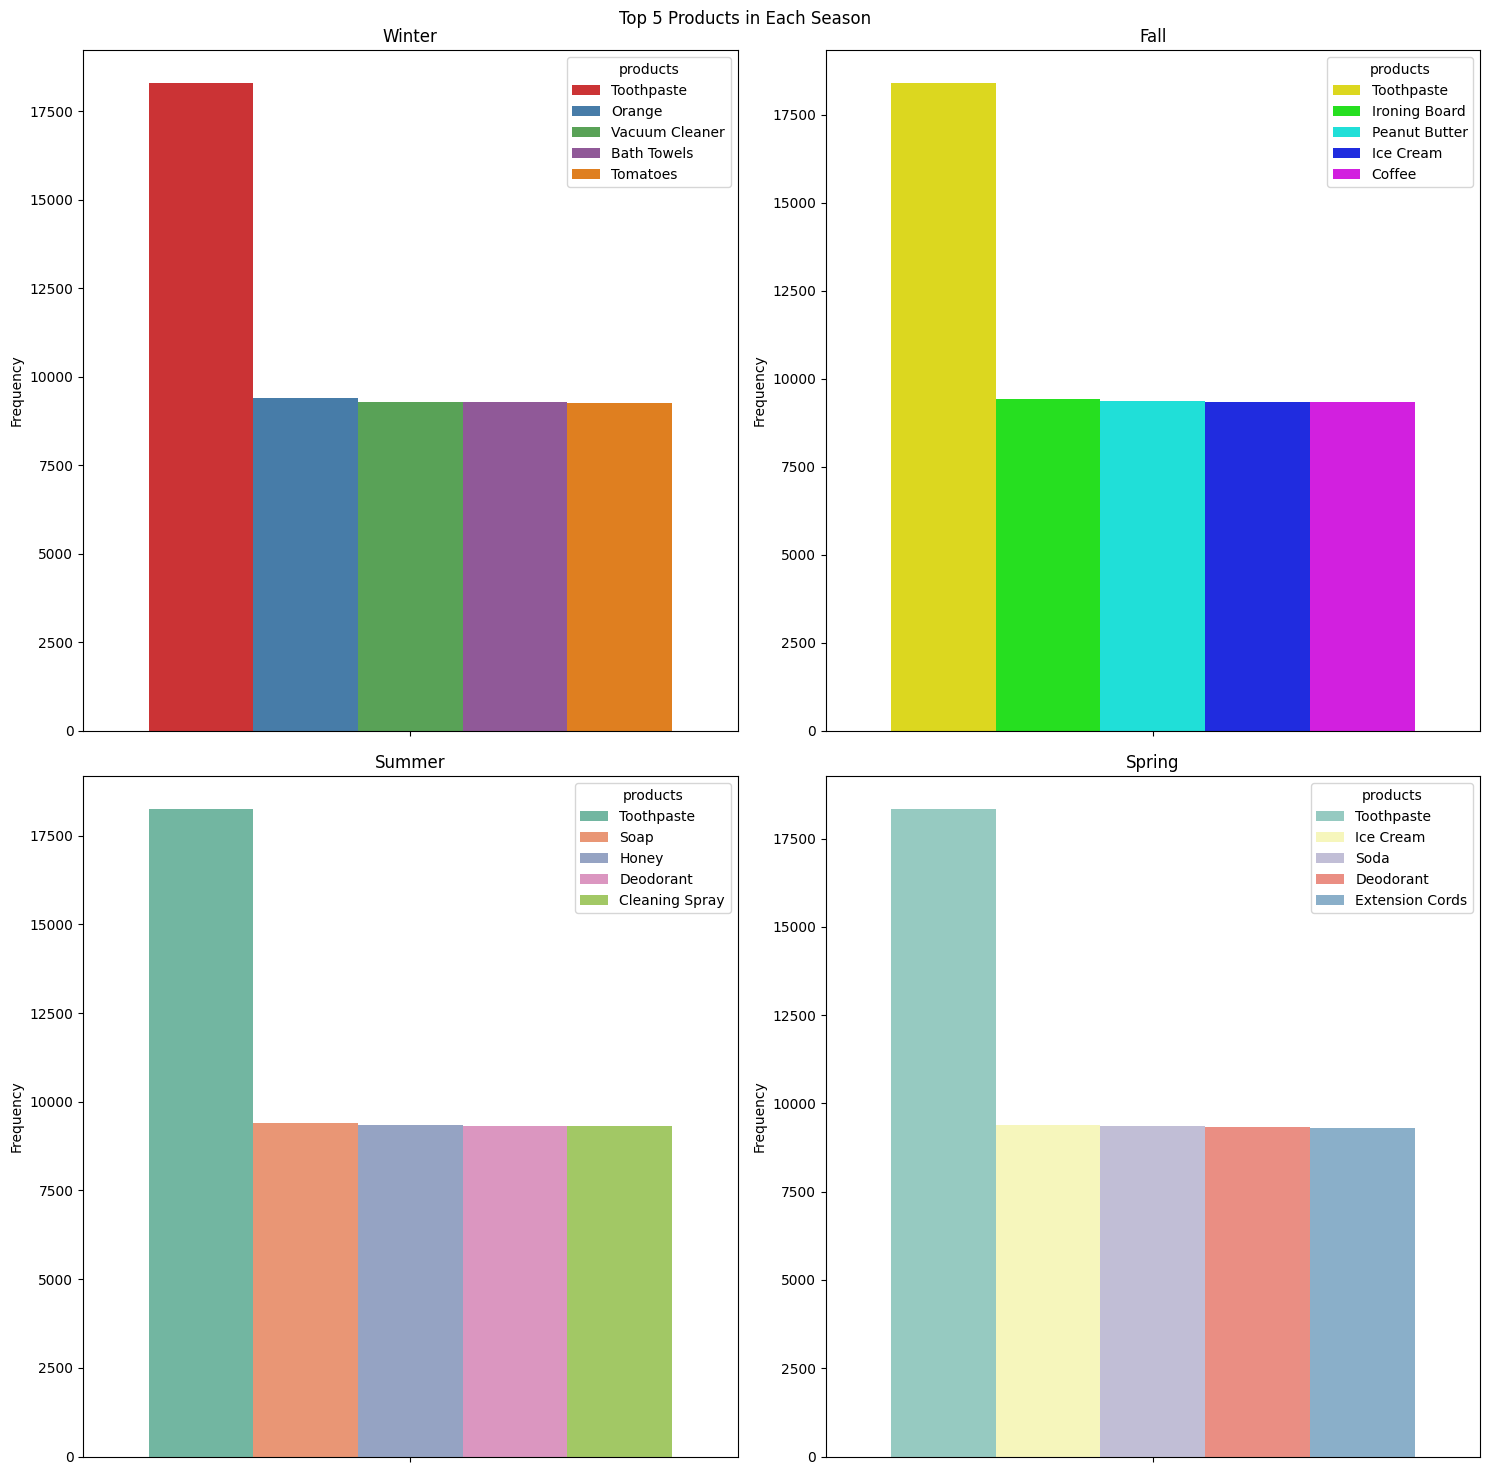

In [13]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

sns.barplot(hue=winter.products,y=winter['count'],ax=axes[0][0],palette='Set1')
sns.barplot(hue=Fall.products,y=Fall['count'],ax=axes[0][1],palette='hsv')
sns.barplot(hue=summer.products,y=summer['count'],ax=axes[1][0],palette='Set2')
sns.barplot(hue=spring.products,y=spring['count'],ax=axes[1][1],palette='Set3')
title=["Winter","Fall","Summer","Spring"]
count=0
for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    axes[i][j].set_ylabel('Frequency')
    count+=1
plt.suptitle('Top 5 Products in Each Season')
plt.tight_layout()

In [14]:
data['Avg_Transaction_Cost'] = data.groupby('Product')['Total_Cost'].transform('mean')
data['Total_Transactions'] = data.groupby('Customer_Name')['Transaction_ID'].transform('count')

In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Total_Cost', 'Total_Transactions']])


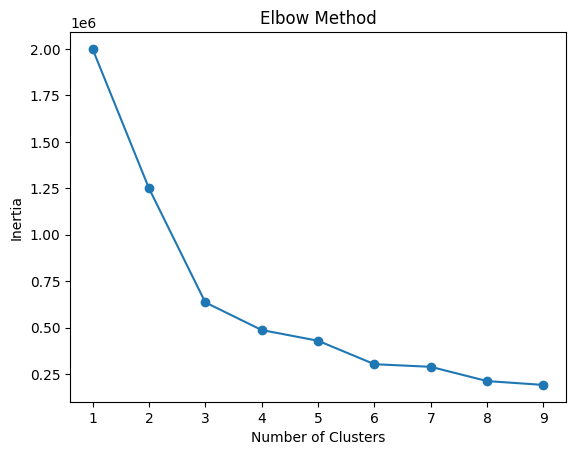

In [38]:

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)
clusters = kmeans.fit_predict(data_scaled)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



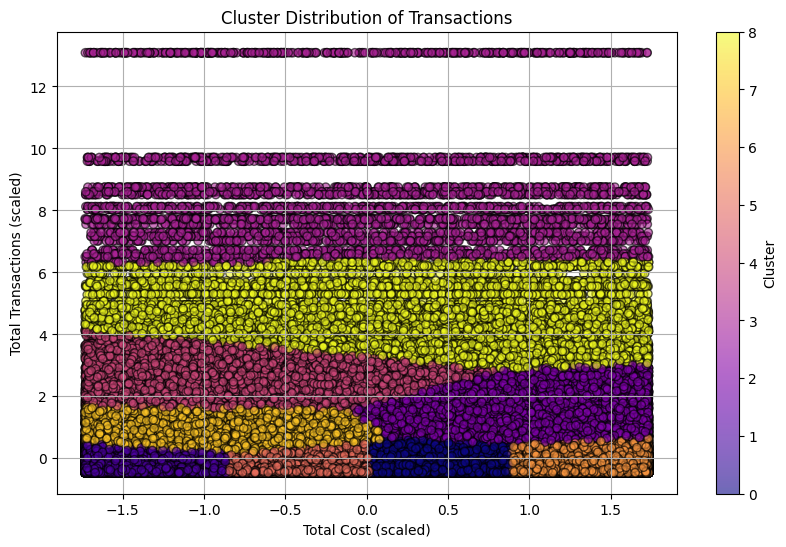

In [40]:

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0],data_scaled[:, 1], c=clusters, cmap='plasma', edgecolor='k', alpha=0.6)
plt.xlabel('Total Cost (scaled)')
plt.ylabel('Total Transactions (scaled)')
plt.colorbar(label='Cluster')
plt.title('Cluster Distribution of Transactions')
plt.grid(True)
plt.show()


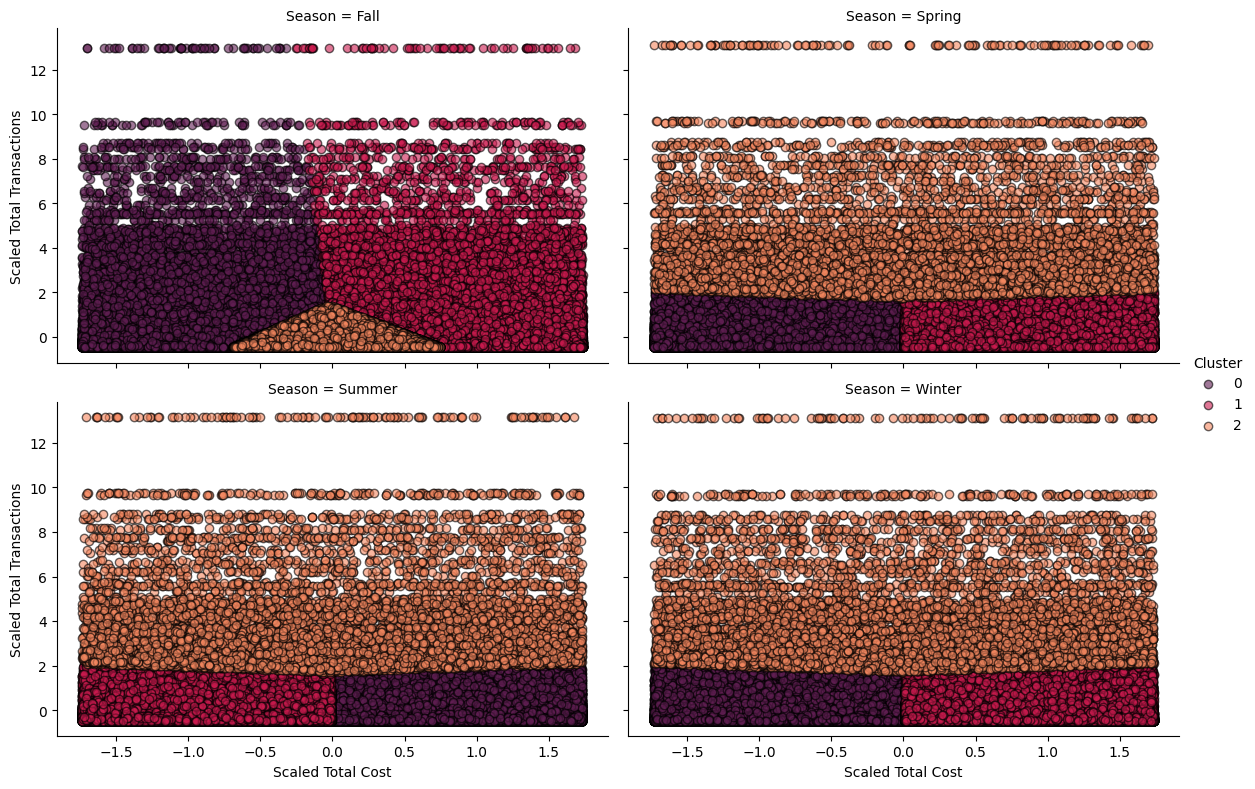

In [41]:
scaler = StandardScaler()


data['scaled_Total_Cost'] = data.groupby('Season')['Total_Cost'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())
data['scaled_Total_Transactions'] = data.groupby('Season')['Total_Transactions'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

k = 3 


data['Cluster'] = 0

for season in data['Season'].unique():
    
    season_data = data[data['Season'] == season][['scaled_Total_Cost', 'scaled_Total_Transactions']]
    
   
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(season_data)
    
    
    data.loc[data['Season'] == season, 'Cluster'] = clusters

g = sns.FacetGrid(data, col="Season", hue="Cluster", col_wrap=2, palette='rocket', height=4, aspect=1.5)

g.map(plt.scatter, 'scaled_Total_Cost', 'scaled_Total_Transactions',edgecolor='k', alpha=0.6)
g.add_legend()
g.set_axis_labels('Scaled Total Cost', 'Scaled Total Transactions')

plt.show()

